In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='latin1')

# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Confirm data types
print(df.dtypes)

# Handle outliers
# Remove sales outliers > 5000 and profit outliers outside (-1000, 3000)
df = df[(df['Sales'] <= 5000) & (df['Profit'].between(-1000, 3000))]

# Add Year, Month, Quarter columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity    

In [ ]:
# Total Sales, Profit, Quantity
print(df[['Sales', 'Profit', 'Quantity']].sum())

# Sales by Year
print(df.groupby('Year')['Sales'].sum())

# Sales by Quarter
print(df.groupby('Quarter')['Sales'].sum())

# Sales by Region
print(df.groupby('Region')['Sales'].sum())

# Sales by Category and Sub-Category
print(df.groupby(['Category', 'Sub-Category'])['Sales'].sum())


#profit margin

df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
print(df[['Sales', 'Profit', 'Profit Margin']].head())





Sales       2.077974e+06
Profit      2.779432e+05
Quantity    3.765700e+04
dtype: float64
Year
2014    425736.9321
2015    451589.7000
2016    544574.3650
2017    656073.1382
Name: Sales, dtype: float64
Quarter
1    297435.6518
2    423907.6886
3    575832.6277
4    780798.1672
Name: Sales, dtype: float64
Region
Central    441227.9728
East       607934.4210
South      333175.4720
West       695636.2695
Name: Sales, dtype: float64
Category         Sub-Category
Furniture        Bookcases       111796.5663
                 Chairs          328449.1030
                 Furnishings      91705.1640
                 Tables          200353.7720
Office Supplies  Appliances      107068.9130
                 Art              27118.7920
                 Binders         151893.7420
                 Envelopes        16476.4020
                 Fasteners         3024.2800
                 Labels           12486.3120
                 Paper            78479.2060
                 Storage         223843.6

In [9]:
# Unique customers
print(df['Customer ID'].nunique())

# Sales by Segment
print(df.groupby('Segment')['Sales'].sum())

# Average Order Value by Segment
aov = df.groupby('Segment').apply(lambda x: x['Sales'].sum() / x['Order ID'].nunique())
print(aov)

# Top 10 customers by sales
print(df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10))


793
Segment
Consumer       1.037553e+06
Corporate      6.572661e+05
Home Office    3.831549e+05
Name: Sales, dtype: float64
Segment
Consumer       401.840858
Corporate      434.699823
Home Office    422.442015
dtype: float64
Customer Name
Greg Tran           11820.1200
Seth Vernon         11470.9500
Caroline Jumper     11164.9740
Clay Ludtke         10880.5460
Maria Etezadi       10663.7280
Karen Ferguson      10604.2660
Edward Hooks        10310.8800
John Lee             9799.9230
Helen Wasserman      9300.2540
Justin Deggeller     8828.0305
Name: Sales, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_19564\3707002667.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  aov = df.groupby('Segment').apply(lambda x: x['Sales'].sum() / x['Order ID'].nunique())


In [10]:
# Orders by Shipping Mode
print(df['Ship Mode'].value_counts())

# Average delivery time
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days
print(df['Delivery Days'].mean())

# Profit and Sales by Ship Mode
print(df.groupby('Ship Mode')[['Sales', 'Profit']].sum())


Ship Mode
Standard Class    5942
Second Class      1939
First Class       1533
Same Day           542
Name: count, dtype: int64
3.957412615508236
                       Sales       Profit
Ship Mode                                
First Class     3.205892e+05   44260.4271
Same Day        1.203631e+05   19731.7493
Second Class    4.262526e+05   55791.9488
Standard Class  1.210769e+06  158159.1245


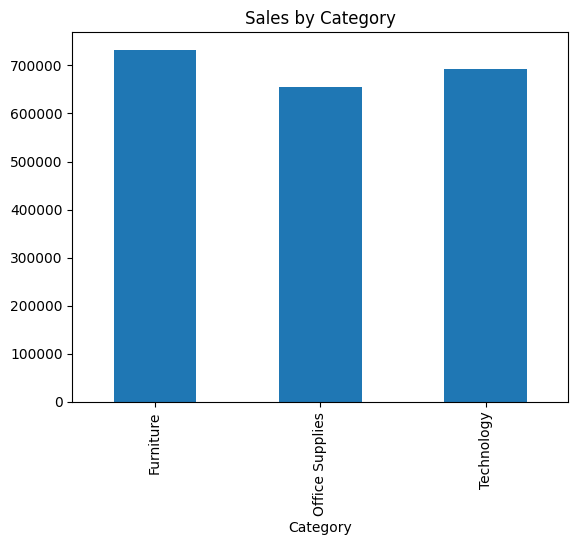

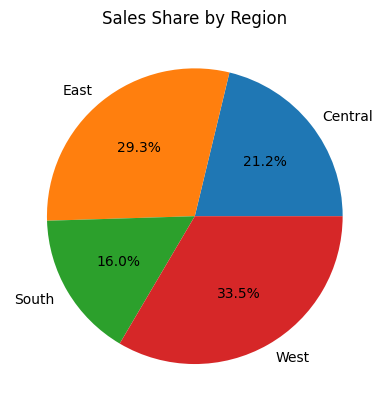

In [19]:
# Sales by Category Bar
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Sales by Category')
plt.show()

# Sales by Region Pie
df.groupby('Region')['Sales'].sum().plot(kind='pie', autopct='%1.1f%%', title='Sales Share by Region')
plt.ylabel('')
plt.show()


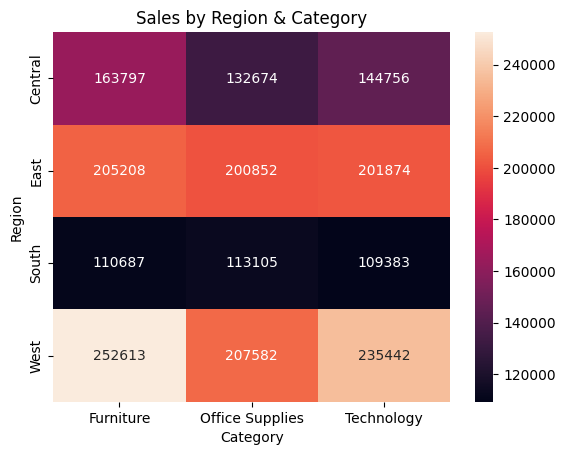

In [20]:
pivot = df.pivot_table(index='Region', columns='Category', values='Sales', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Sales by Region & Category")
plt.show()


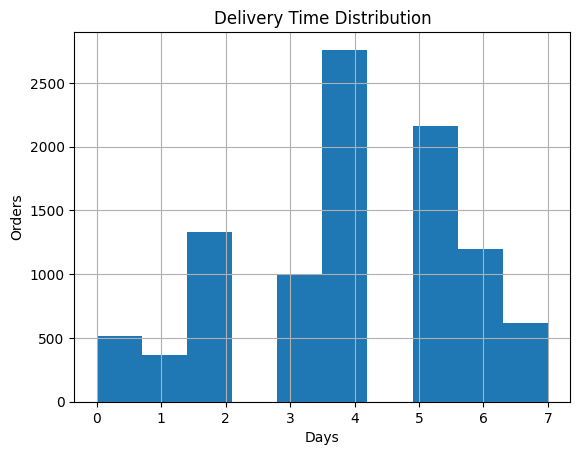

In [21]:
df['Delivery Days'].hist(bins=10)
plt.title("Delivery Time Distribution")
plt.xlabel("Days")
plt.ylabel("Orders")
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
15:10:16 - cmdstanpy - INFO - Chain [1] start processing
15:10:17 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


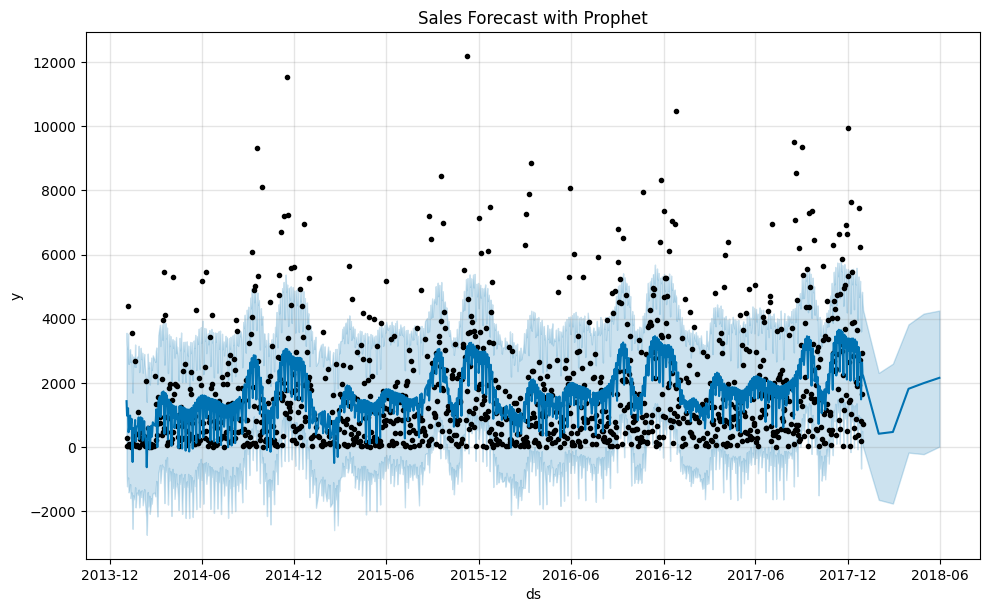

In [22]:
from prophet import Prophet

# Prepare data
forecast_df = df.groupby('Order Date')['Sales'].sum().reset_index().rename(columns={'Order Date':'ds', 'Sales':'y'})

# Prophet model
model = Prophet()
model.fit(forecast_df)

# Future DataFrame
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Sales Forecast with Prophet")
plt.show()


In [45]:
Sales_by_category = df.groupby('Category')['Sales'].sum()
print(Sales_by_category) 

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


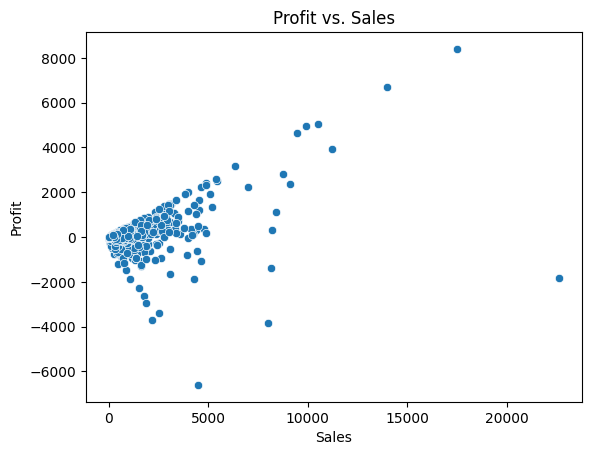

In [47]:

sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Profit vs. Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()
